<a href="https://colab.research.google.com/github/21skar4/Stock-Market-Prediction-using-ARIMA-Model-SoC/blob/main/Stock_Market_Prediction_ARIMA_Model_SoC'22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import math
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from pandas import DataFrame
from pandas import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


In [57]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Load data from yfinance for the Stock**


In [58]:

import yfinance as yf

from datetime import date

stock = 'MSFT'

period = '12mo' # 1mo, 1y,...

data = yf.download(stock, period=period)


df = pd.DataFrame(data)

df.to_csv(str('today') + '_' + 'stock' + '.csv')
msft_6M = df

[*********************100%***********************]  1 of 1 completed


In [59]:
msft_6M = pd.read_csv('today_stock.csv')

**To check NAN data**

In [60]:
msft_6M.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Date   Open   High    Low  Close  Adj Close  Volume
0    False  False  False  False  False      False   False
1    False  False  False  False  False      False   False
2    False  False  False  False  False      False   False
3    False  False  False  False  False      False   False
4    False  False  False  False  False      False   False
..     ...    ...    ...    ...    ...        ...     ...
247  False  False  False  False  False      False   False
248  False  False  False  False  False      False   False
249  False  False  False  False  False      False   False
250  False  False  False  False  False      False   False
251  False  False  False  False  False      False   False

[252 rows x 7 columns]>

In [61]:
[msft_6M.isna().any(axis=1)]

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 247    False
 248    False
 249    False
 250    False
 251    False
 Length: 252, dtype: bool]

**Drop NAN data if any**


In [62]:
msft_6M1 = msft_6M.dropna()
msft_6M1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,278.929993,280.369995,274.450012,277.010010,274.766388,32935600
1,2021-07-20,278.029999,280.970001,276.260010,279.320007,277.057709,26259700
2,2021-07-21,278.899994,281.519989,277.290009,281.399994,279.120819,24364300
3,2021-07-22,283.839996,286.420013,283.420013,286.140015,283.822449,23384100
4,2021-07-23,287.369995,289.989990,286.500000,289.670013,287.323883,22768100
...,...,...,...,...,...,...,...
247,2022-07-12,265.880005,265.940002,252.039993,253.669998,253.669998,35868500
248,2022-07-13,250.190002,253.550003,248.110001,252.720001,252.720001,29497400
249,2022-07-14,250.570007,255.139999,245.940002,254.080002,254.080002,25102800
250,2022-07-15,255.720001,260.369995,254.770004,256.720001,256.720001,29572500


**Check wheather data type of "Date" is DateTime or not**

In [63]:
type(msft_6M1.Date[0])

str

In [64]:
msft_6M1['Date'] = pd.to_datetime(msft_6M1['Date'])


In [65]:
type(msft_6M1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [66]:
msft_6M1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,278.929993,280.369995,274.450012,277.010010,274.766388,32935600
1,2021-07-20,278.029999,280.970001,276.260010,279.320007,277.057709,26259700
2,2021-07-21,278.899994,281.519989,277.290009,281.399994,279.120819,24364300
3,2021-07-22,283.839996,286.420013,283.420013,286.140015,283.822449,23384100
4,2021-07-23,287.369995,289.989990,286.500000,289.670013,287.323883,22768100
...,...,...,...,...,...,...,...
247,2022-07-12,265.880005,265.940002,252.039993,253.669998,253.669998,35868500
248,2022-07-13,250.190002,253.550003,248.110001,252.720001,252.720001,29497400
249,2022-07-14,250.570007,255.139999,245.940002,254.080002,254.080002,25102800
250,2022-07-15,255.720001,260.369995,254.770004,256.720001,256.720001,29572500


In [67]:
msft_6M2 = msft_6M1.groupby('Date')[['Close']].mean()

In [68]:
msft_6M2

,Close
Date,
2021-07-19,277.010010
2021-07-20,279.320007
2021-07-21,281.399994
2021-07-22,286.140015
2021-07-23,289.670013
...,...
2022-07-12,253.669998
2022-07-13,252.720001
2022-07-14,254.080002


**Stationarity test with ACF and PACF**

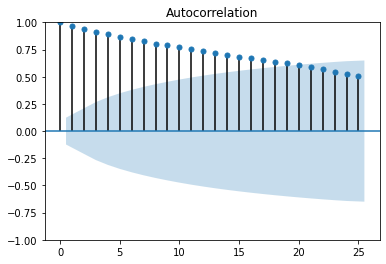

In [69]:
plot_acf(msft_6M2['Close'])
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


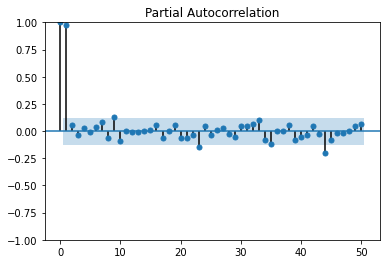

In [70]:
plot_pacf(msft_6M2['Close'], lags=50)
pyplot.show()

**Stationarity test with Dickey Fuller Test**

In [71]:
result = adfuller(msft_6M2['Close'])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('#Lags Used : %f'% result[2])
print('Number of Observation Used: %f' % (result[3]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


(-1.3979076435264608, 0.5832788084193357, 0, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 1465.5386553629126)
ADF Statistic: -1.397908
p-value: 0.583279
#Lags Used : 0.000000
Number of Observation Used: 251.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


*ADF Test Statistics > Critical values and p-value > 0.05.There is weak evidance againts null-hypothesis.So it is not stationary.*


**Differencing method to discard null hypothesis of the Dickey Fuller Test**

In [72]:
msft_6M2['Close First Difference'] = msft_6M2['Close'] - msft_6M2['Close'].shift(1)
msft_6M2['Close'].shift(1)



Date
2021-07-19           NaN
2021-07-20    277.010010
2021-07-21    279.320007
2021-07-22    281.399994
2021-07-23    286.140015
                 ...    
2022-07-12    264.510010
2022-07-13    253.669998
2022-07-14    252.720001
2022-07-15    254.080002
2022-07-18    256.720001
Name: Close, Length: 252, dtype: float64

**Re-test with Dickey Fuller test after performimg Differencing**

In [73]:
result1 = adfuller(msft_6M2['Close First Difference'].dropna())
print(result1)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('#Lags Used : %f'% result1[2])
print('Number of Observation Used: %f' % (result1[3]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 


(-16.786876139290445, 1.251134521470505e-29, 0, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 1460.8229969153076)
ADF Statistic: -16.786876
p-value: 0.000000
#Lags Used : 0.000000
Number of Observation Used: 250.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


*Strong evidance against null-hypothesis of Adfuller test.
So stationary.*

Text(0, 0.5, 'Price')

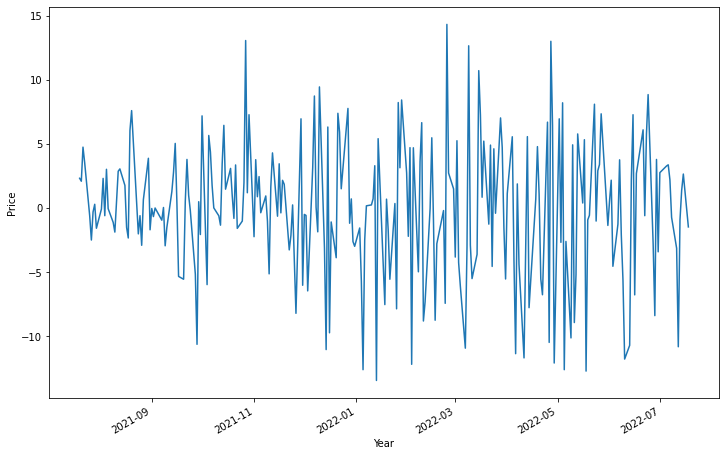

In [74]:
msft_6M2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Price')

**Finding optimum p , d and q values for ARIMA Model with auto_arima**

In [75]:
stepwise_fit = auto_arima(msft_6M2['Close'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1558.850, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1552.978, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1553.966, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1553.988, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1551.045, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1555.782, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.036 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -774.522
Date:                Mon, 18 Jul 2022   AIC                           1551.045
Time:                        19:04:22   BIC                           1554.570
Sample:                             0   HQIC                          1552.464
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        28.0395      2.425     11.561      0.000      23.286      32.793
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.31   Pr

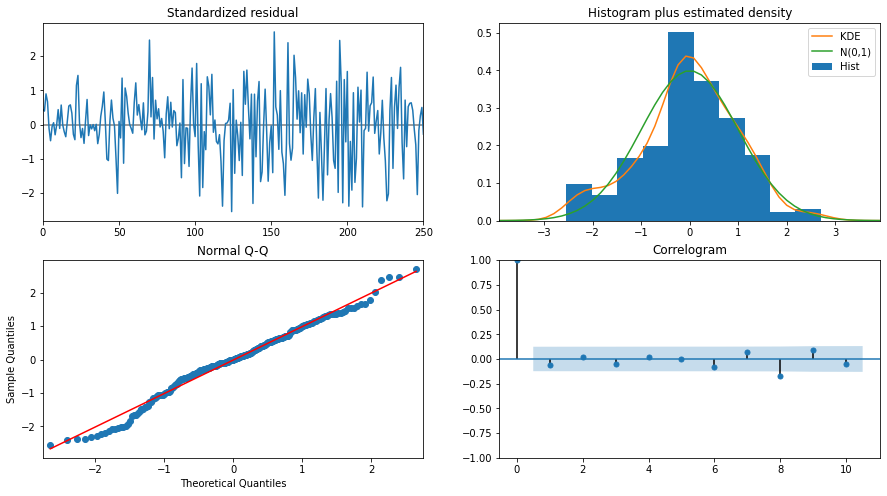

In [76]:
print(stepwise_fit.summary())
stepwise_fit.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

**Building the model**

In [77]:

series = msft_6M2['Close']
X = series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)] 
model = ARIMA(train, order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())




                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  176
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -525.732
Date:                Mon, 18 Jul 2022   AIC                           1053.464
Time:                        19:04:23   BIC                           1056.629
Sample:                             0   HQIC                          1054.748
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        23.8192      2.262     10.528      0.000      19.385      28.253
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.53   Pr

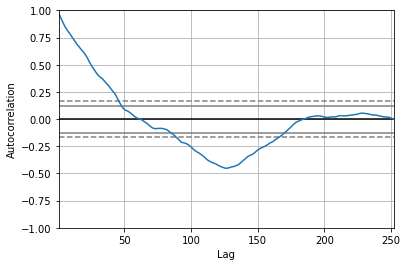

<Figure size 800x560 with 0 Axes>

In [78]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

**Testing**

In [79]:

history = [i for i in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

print(predictions)

[310.70001220703125, 315.4100036621094, 313.8599853515625, 308.3099975585937, 309.4200134277344, 314.9700012207031, 310.8800048828125, 299.5, 301.3699951171875, 296.9700012207031, 285.260009765625, 282.0599975585937, 287.6199951171875, 279.8299865722656, 280.5199890136719, 285.29998779296875, 286.3599853515625, 280.8099975585937, 274.0299987792969, 280.7200012207031, 270.2200012207031, 283.2200012207031, 289.6300048828125, 277.5199890136719, 284.4700012207031, 281.7799987792969, 289.9800109863281, 277.3500061035156, 274.7300109863281, 264.5799865722656, 269.5, 260.54998779296875, 255.35000610351562, 261.1199951171875, 261.5, 266.82000732421875, 254.0800018310547, 253.13999938964844, 252.55999755859372, 260.6499938964844, 259.6199951171875, 262.5199890136719, 265.8999938964844, 273.239990234375, 271.8699951171875, 272.4200134277344, 274.5799865722656, 270.0199890136719, 268.75, 272.5, 270.4100036621094, 264.7900085449219, 252.99000549316406, 242.25999450683597, 244.4900054931641, 251.75

**Performance Test**

In [80]:


mse = mean_squared_error(test, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
print('MAPE: '+str(mape))
#Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the next 15 observations.

MSE: 37.7576022198957
MAE: 5.027990441573298
RMSE: 6.144721492459663
MAPE: 0.01858609081589451


**Plot the predicted (from ARIMA) and real prices**

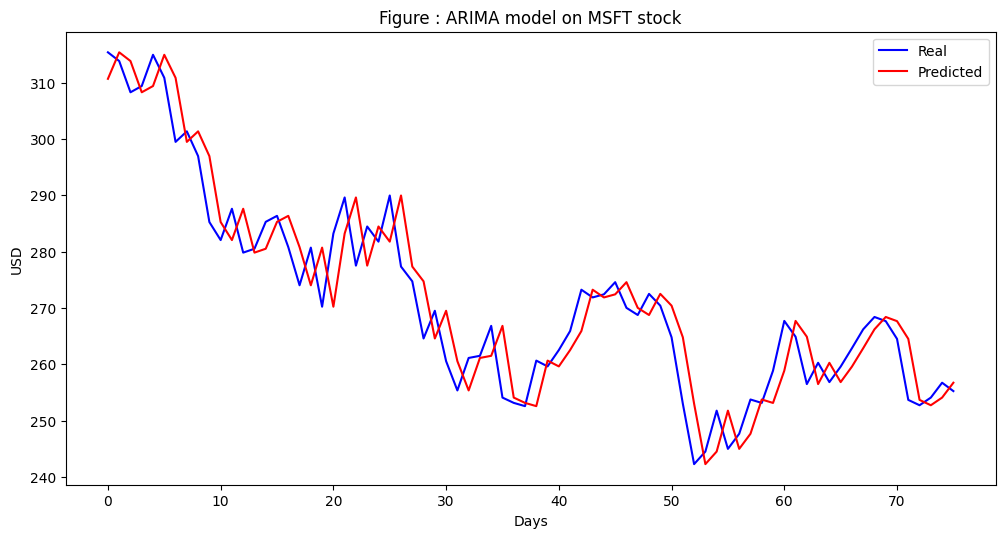

In [81]:


plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='blue', label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure : ARIMA model on MSFT stock')
plt.legend()
plt.show()